Configurable Histogram
===================

This example details a simple histogram. As long as DATABASE, type_plotted, and scalar_plotted are valid and meaningful, this histogram will work with any Sina-formatted database.

By default, it creates a histogram for the "depth" scalar found in "obs" Records in the NOAA database, sorting those values into 50 bins. These and most other graph parameters can be changed in the following cell.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import sina.datastores.sql as backend

# Generate matplotlib plots in interactive mode
%matplotlib notebook

# Graph customization
DATABASE = "/collab/usr/gapps/wf/examples/data/noaa/noaa.sqlite"
type_plotted = "obs"
scalar_plotted = "depth"
num_bins = 50
plot_title = "Occurrence rate of {}".format(scalar_plotted)
y_label = "# Occurrences"

Now that the parameters have been set, we can extract our data and create the graph. You can tweak the parameters at any time; just edit the cell above, run it, then recreate the graph. You can of course keep the parameters and logic in the same cell (they're separated here for readability).

Once displayed, you can interact with the plot through the buttons shown in the lower left corner below the plot *provided interaction is enabled*.  Options including pan, zoom, and download.  Click the left-most "home" button to restore the orignal layout.

Loading the data from the database, which may take a while.
The data is loaded.  Creating the plot.


<IPython.core.display.Javascript object>


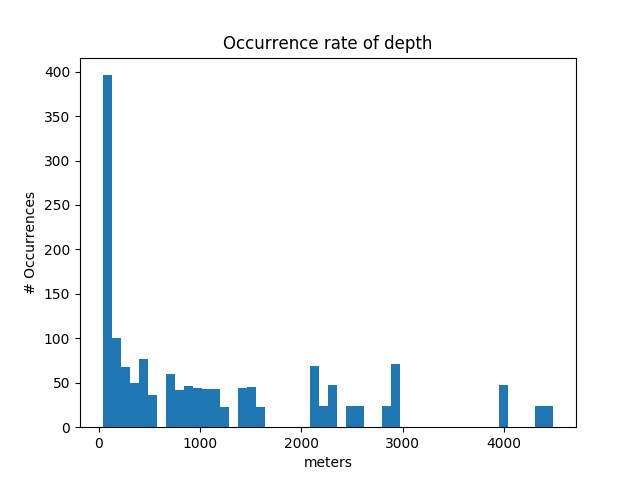

In [10]:
factory = backend.DAOFactory(DATABASE)
rec_dao = factory.createRecordDAO()

print("Loading the data from the database, which may take a while.")

# We first get all the records of a certain type
records_of_interest = rec_dao.get_all_of_type(type_plotted)

# We then fetch the scalars for them
for record in records_of_interest:
    scalar = record['data'][scalar_plotted]
    list_of_scalars.append(scalar['value'])

units = scalar['units']

print("The data is loaded.  Creating the plot.")

# Create the graph
plt.hist(values, num_bins)
plt.ylabel(y_label)
plt.xlabel(units)
plt.title(plot_title)

plt.show()